<a href="https://colab.research.google.com/github/r5racker/012_RahilBhensdadia/blob/main/LAB_04_1_Weather_Entropy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree

Prepare dataset

In [15]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast',
            'Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast', 'Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool',
                'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal',
            'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True',
            'False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No',
'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']



Encoding the features using one-hot encoding

In [26]:
from sklearn.preprocessing import OneHotEncoder
X = tuple(zip(Outlook, Temperature, Humidity, Wind))
print(X)
X_enc = OneHotEncoder(drop='first').fit_transform(X).toarray()
print(X_enc)

(('Rainy', 'Hot', 'High', 'False'), ('Rainy', 'Hot', 'High', 'True'), ('Overcast', 'Hot', 'High', 'False'), ('Sunny', 'Mild', 'High', 'False'), ('Sunny', 'Cool', 'Normal', 'False'), ('Sunny', 'Cool', 'Normal', 'True'), ('Overcast', 'Cool', 'Normal', 'True'), ('Rainy', 'Mild', 'High', 'False'), ('Rainy', 'Cool', 'Normal', 'False'), ('Sunny', 'Mild', 'Normal', 'False'), ('Rainy', 'Mild', 'Normal', 'True'), ('Overcast', 'Mild', 'High', 'True'), ('Overcast', 'Hot', 'Normal', 'False'), ('Sunny', 'Mild', 'High', 'True'))
[[1. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1.]
 [1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 1. 0.]
 [1. 0. 0. 1. 1. 1.]
 [0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1.]]


# step 4 :- merge different features to prepare dataset

In [27]:
# create a tuples of different values

features = X_enc
print("\nFeatures\n")
for pair in features:
  print(pair)



Features

[1. 0. 1. 0. 0. 0.]
[1. 0. 1. 0. 0. 1.]
[0. 0. 1. 0. 0. 0.]
[0. 1. 0. 1. 0. 0.]
[0. 1. 0. 0. 1. 0.]
[0. 1. 0. 0. 1. 1.]
[0. 0. 0. 0. 1. 1.]
[1. 0. 0. 1. 0. 0.]
[1. 0. 0. 0. 1. 0.]
[0. 1. 0. 1. 1. 0.]
[1. 0. 0. 1. 1. 1.]
[0. 0. 0. 1. 0. 1.]
[0. 0. 1. 0. 1. 0.]
[0. 1. 0. 1. 0. 1.]


In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, Play_encoded, test_size = 0.1, random_state = 12)
print(x_train)

[[0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 1. 1.]
 [1. 0. 0. 1. 1. 1.]
 [1. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0.]
 [1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 1. 0. 1. 0. 1.]
 [0. 0. 0. 1. 0. 1.]]


# step 5 :- train "Create and train DecisionTreeClassifier"

In [29]:
# Create a decisionTreeCalssifier object

from sklearn import metrics

dtc = DecisionTreeClassifier(criterion = "entropy")
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

# Accuracy
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.5


# step 6 :- Predict output for new data

In [30]:
# Prediction
print(x_test)

# y_predicted = dtc.predict(x_test)
print("y predicted : ", y_pred)

# y_predicted = dtc.predict(x_test)
print(f"Actual y_test {y_test}")

[[1. 0. 0. 1. 0. 0.]
 [0. 1. 0. 1. 1. 0.]]
y predicted :  [1 1]
Actual y_test [0 1]


In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[0, 1],
       [0, 1]])

In [40]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print(metrics.classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



Confusion matrix:
[[0 1]
 [0 1]]


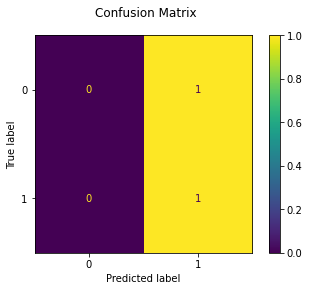

In [33]:
disp = metrics.plot_confusion_matrix(dtc, x_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

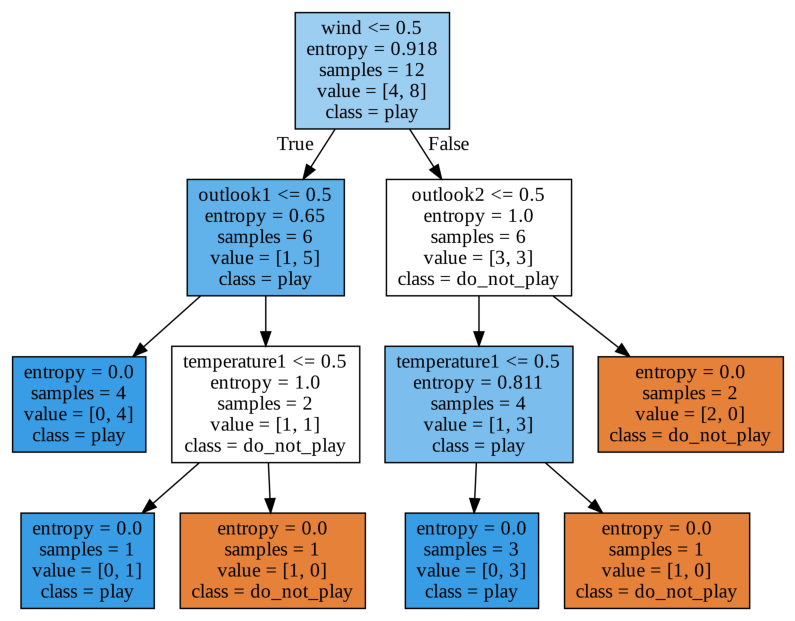

In [35]:
from subprocess import call
export_graphviz(dtc,out_file='tree_entropy.dot',
               feature_names=['outlook1','outlook2','temperature1','temperature2','humidity','wind'],
               class_names=['do_not_play','play'], 
               filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree_entropy.dot', '-o', 'tree_entropy.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree_entropy.png'))
plt.axis('off');
plt.show();